In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline

In [28]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [29]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [30]:
df['Age'].mean()

45.3384

In [31]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [32]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [33]:
df.shape

(5000, 14)

In [34]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Data Preparation

In [35]:
#dropping zipcode as it is not ncessary for model building
df=df.drop(['ZIP Code'],1)

C:\Users\USER\AppData\Local\Temp/ipykernel_11424/2166108535.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [36]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


# Checking for Outliers

In [37]:
# Checking for outliers in the continuous variables

df1=df[['Age','Experience','Income','CCAvg','Mortgage']]

In [38]:
df1.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937913,56.498800
std,11.463166,11.467954,46.033729,1.747666,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
90%,61.000000,36.000000,145.000000,4.300000,200.000000
95%,63.000000,38.000000,170.000000,6.000000,272.000000
99%,65.000000,41.000000,193.000000,8.000000,431.010000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

In [39]:
##Checking for Missing Values... Adding up the missing values (column-wise)

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Exploratory Analysis

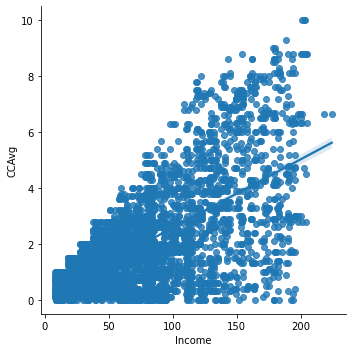

In [40]:
sns.lmplot(x='Income',y='CCAvg',data=df)

the scatter plot above shows that the more your income,the more your Avg. spending on credit cards per month. thus there exist a postive relationship between Customer Income and their spending on credit cards. 

<AxesSubplot:xlabel='Age', ylabel='count'>

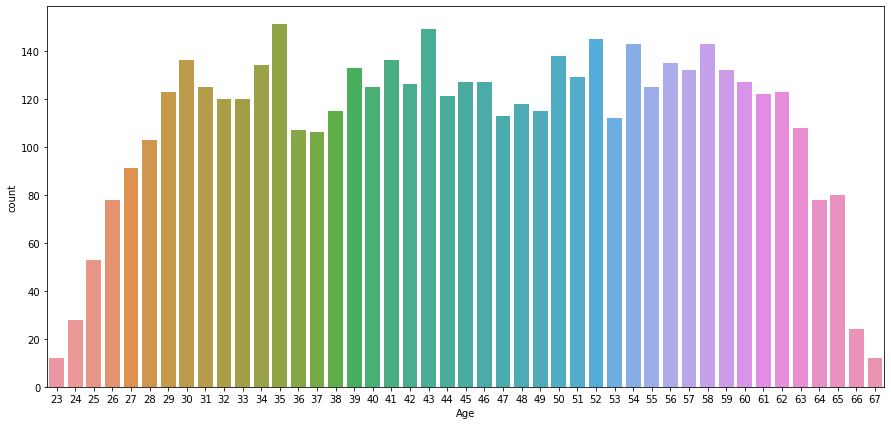

In [41]:
fig=plt.figure(figsize=(15,7))
sns.countplot(x='Age',data=df)

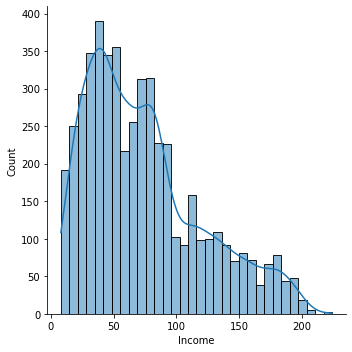

In [42]:
# fig=plt.figure(figsize=(50,40))
sns.displot(data=df,x='Income' , kde=True)

In [43]:
# To check whether or not there is any missing values using seaborn

<AxesSubplot:>

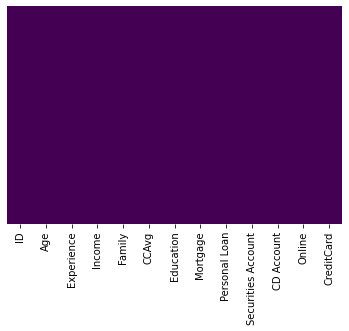

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
x= dict(Counter(df['Education']))
x

{1: 2096, 2: 1403, 3: 1501}

([<matplotlib.patches.Wedge at 0x1be75cd7ee0>,
 [Text(0.27623574505606585, 1.064750587298885, '1'),
  Text(-1.0240212101623698, -0.40172199483921184, '2'),
  Text(0.646004538071224, -0.8903247367064361, '3')],
 [Text(0.15067404275785407, 0.5807730476175735, '41.92%'),
  Text(-0.558557023724929, -0.2191210880941155, '28.06%'),
  Text(0.3523661116752131, -0.48563167456714684, '30.02%')])

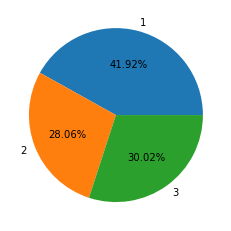

In [46]:
plt.pie(x.values(),labels=x.keys(),autopct='%1.2f%%')

The above shows that most of the banks customers are Undergraduates recording to about 41.92% followed by the advanced/ Professional amount to about 30.02% and the graduates, the least

<AxesSubplot:xlabel='Education', ylabel='Income'>

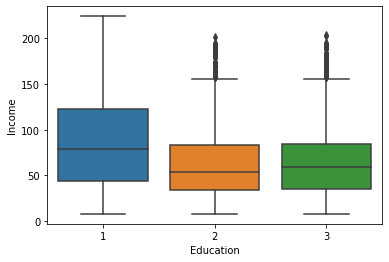

In [47]:
sns.boxplot(x="Education",y="Income",data=df)

<AxesSubplot:>

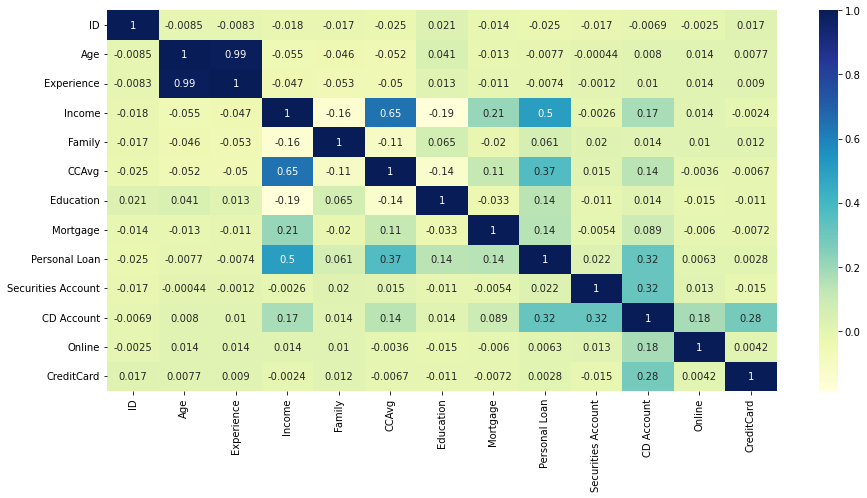

In [48]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

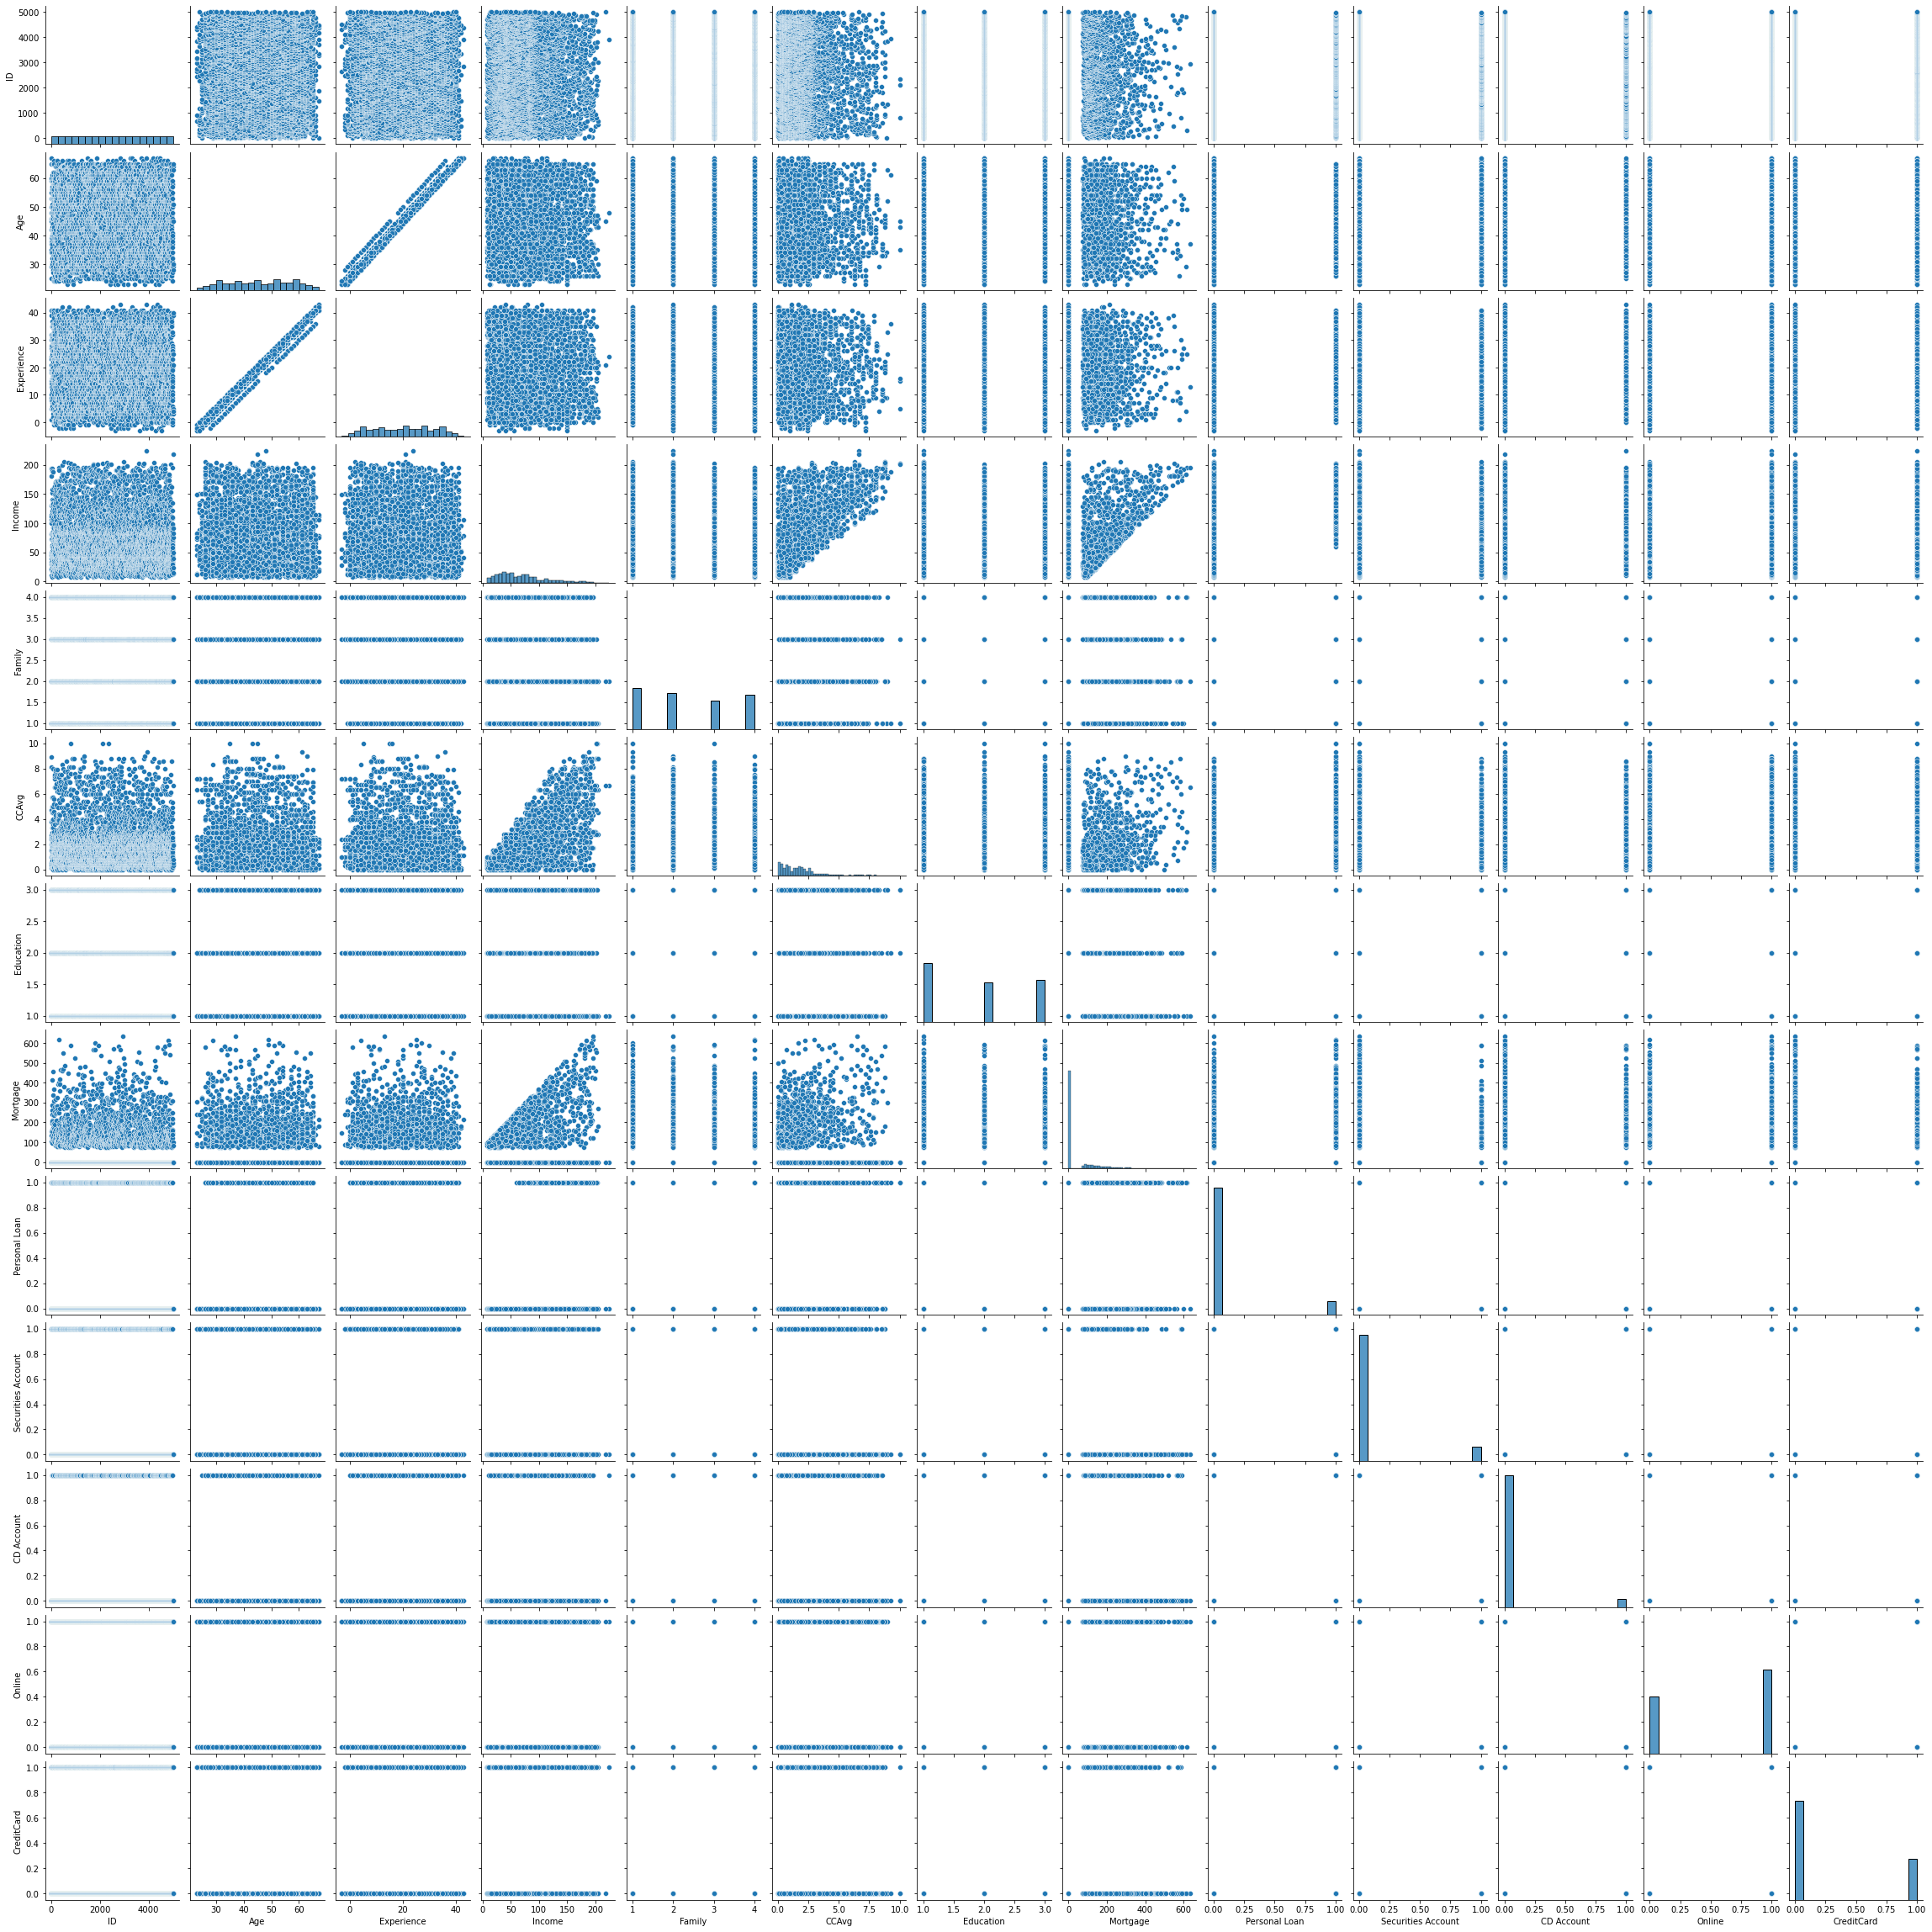

In [25]:
sns.pairplot(df)

In [49]:
init_notebook_mode(connected=True)

In [50]:
cf.go_offline()

## Identifying the number of unique characters in each columns

In [51]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Pre - train

In [52]:
dm=df.drop(columns=['Income'],axis=1)
dm

,ID,Age,Experience,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,4,1.6,1,0,0,1,0,0,0
1,2,45,19,3,1.5,1,0,0,1,0,0,0
2,3,39,15,1,1.0,1,0,0,0,0,0,0
3,4,35,9,1,2.7,2,0,0,0,0,0,0
4,5,35,8,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,3,0.5,2,0,0,0,0,1,0


# To address the problem of Multicollinearity, we identify predetermined data with high correlation (assume high correlation  limit is 0.60000)

### Drop Age

In [54]:
dm.corr()>0.600000

,ID,Age,Experience,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,True,False,False,False,False,False,False,False,False,False,False,False
Age,False,True,True,False,False,False,False,False,False,False,False,False
Experience,False,True,True,False,False,False,False,False,False,False,False,False
Family,False,False,False,True,False,False,False,False,False,False,False,False
CCAvg,False,False,False,False,True,False,False,False,False,False,False,False
Education,False,False,False,False,False,True,False,False,False,False,False,False
Mortgage,False,False,False,False,False,False,True,False,False,False,False,False
Personal Loan,False,False,False,False,False,False,False,True,False,False,False,False
Securities Account,False,False,False,False,False,False,False,False,True,False,False,False
CD Account,False,False,False,False,False,False,False,False,False,True,False,False


#### NB: Multicollinearity is a condition where two or more independent variables in a regression model are highly correlated with each other

In [55]:
drop_Age=dm.drop(columns=['ID','Age','Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],axis=1)
drop_Age

,Experience,Family,CCAvg,Education,Mortgage
0,1,4,1.6,1,0
1,19,3,1.5,1,0
2,15,1,1.0,1,0
3,9,1,2.7,2,0
4,8,4,1.0,2,0
...,...,...,...,...,...
4995,3,1,1.9,3,0
4996,4,4,0.4,1,85
4997,39,2,0.3,3,0
4998,40,3,0.5,2,0


# Training the Data

In [56]:
X=drop_Age
y=df['Income']

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Testing the Data

In [58]:
X_train_sm=sm.add_constant(X_train)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [59]:
Income=sm.OLS(y_train,X_train_sm).fit()

In [60]:
Income.params

const         57.347830
Experience    -0.068925
Family        -2.923027
CCAvg         16.258913
Education     -5.119008
Mortgage       0.054364
dtype: float64

In [63]:
Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     550.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:46:13   Log-Likelihood:                -16566.
No. Observations:                3350   AIC:                         3.314e+04
Df Residuals:                    3344   BIC:                         3.318e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.3478      2.406     23.840      0.000      52.631      62.064
Experience    -0.0689      0.052     -1.336      0.182      -0.170       0.032
Family        -2.9230      0.519     -5.636      0.000      -3.940      -1.906
CCAvg         16.2589      0.346     47.013      0.000      15.581      16.937
Education     -5.1190      0.706     -7.249      0.000      -6.504      -3.734
Mortgage       0.0544      0.006      9.183      0.000       0.043       0.066
==============================================================================
Omnibus:                      567.196   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              934.525
Skew:                           1.128   Prob(JB):                    1.18e-203
Kurtosis:                       4.266   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An indicator of how well a statistical model fits the data is the log-likelihood. It is, specifically, the natural logarithm of the likelihood function, which, given the model's parameters, is the probability of witnessing the supplied data.
Since the likelihood function assessed at its maximum is likely to be a high number (since the logarithm of a number between 0 and 1 is negative), a log-likelihood of -16566 in your example indicates that the model fits the data reasonably well.

In [64]:
prediction=Income.predict()
prediction

array([62.15901288, 70.0155808 , 58.4144491 , ..., 54.36173637,
       57.50923827, 65.83339942])

Text(0, 0.5, 'Predicted values')

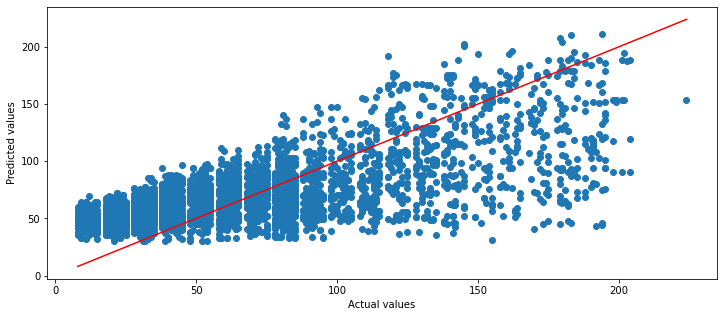

In [65]:
fig=plt.figure(figsize=(12,5))
plt.scatter(y_train,prediction )
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')